https://datascienceschool.net/view-notebook/ef921dc25e01437b9b5c532ba3b89b02/

##### QGIS 2.18.14에서 실습한shp 파이썬코드로 구현

In [1]:
import pandas as pd
import geopandas as gpd
gpd.__version__

#matplotlib 한글 시각화 위한 코드
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

##### 데이터 로드

In [2]:
korea_file = 'C:/Users/병현/Desktop/서울시행정동/AL_00_D001_20200704(SIG).shp'
korea = gpd.read_file(korea_file, encoding = 'cp949')
korea

,A0,A1,A2,A3,geometry
0,689,26110,중구,2020-06-04,"POLYGON ((383223.215 281923.458, 383227.283 28..."
1,1009,26290,남구,2020-06-03,"MULTIPOLYGON (((391313.806 179385.308, 391359...."
2,33,26320,북구,2020-06-03,"POLYGON ((380950.654 190946.150, 381258.614 19..."
3,689,26380,사하구,2020-06-03,"MULTIPOLYGON (((376288.224 178797.878, 376304...."
4,33,26440,강서구,2020-06-03,"MULTIPOLYGON (((372796.991 177197.236, 372790...."
...,...,...,...,...,...
247,371,26170,동구,2020-06-03,"POLYGON ((384470.103 181846.319, 384530.315 18..."
248,33,26200,영도구,2020-06-03,"MULTIPOLYGON (((390052.468 176944.313, 390182...."
249,369,26230,부산진구,2020-06-03,"POLYGON ((383118.294 187750.127, 383089.137 18..."
250,33,26260,동래구,2020-06-03,"MULTIPOLYGON (((386893.214 190045.290, 386885...."


- 서울의 A1은 모두 11로 시작

In [3]:
seoul = korea[korea['A1'].str.startswith('11')]  
seoul.reset_index(inplace = True)
seoul.drop('index' , axis = 1 , inplace = True)
seoul

C:\Anaconda3_19_1222\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,A0,A1,A2,A3,geometry
0,33,11140,중구,2020-06-03,"POLYGON ((199039.967 451760.211, 199060.329 45..."
1,33,11170,용산구,2020-06-03,"POLYGON ((195031.925 447949.046, 195033.882 44..."
2,49,11200,성동구,2020-06-03,"POLYGON ((202296.211 451417.806, 202270.965 45..."
3,49,11230,동대문구,2020-06-03,"POLYGON ((201974.268 452860.634, 201974.872 45..."
4,33,11260,중랑구,2020-06-03,"POLYGON ((207852.300 457470.180, 207854.560 45..."
5,337,11290,서울시성북구,2020-06-03,"POLYGON ((200539.196 457971.047, 200577.303 45..."
6,49,11305,강북구,2020-06-03,"POLYGON ((200329.872 464741.822, 200417.947 46..."
7,33,11320,서울시도봉구,2020-06-03,"POLYGON ((204440.010 462046.320, 204440.000 46..."
8,33,11350,서울시노원구,2020-06-03,"POLYGON ((204002.999 459560.344, 204008.066 45..."
9,33,11380,은평구,2020-06-03,"POLYGON ((196541.414 459472.855, 196541.530 45..."


##### A1에  '서울시' 라는 단어 제거

In [4]:
seoul.loc[seoul['A2'].str.contains('서울시') , 'A2']

5    서울시성북구
7    서울시도봉구
8    서울시노원구
Name: A2, dtype: object

In [5]:
seoul.loc[seoul['A2'].str.contains('서울시') , 'A2'] = seoul.loc[seoul['A2'].str.contains('서울시') , 'A2'].str[3:]

C:\Anaconda3_19_1222\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


##### 이상하게 광진구 좌표가 이상하게찍힘,,

In [6]:
seoul = seoul[seoul['A2']!='광진구']
seoul.reset_index(inplace = True)
seoul.drop('index' , axis = 1 , inplace = True)
seoul

C:\Anaconda3_19_1222\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,A0,A1,A2,A3,geometry
0,33,11140,중구,2020-06-03,"POLYGON ((199039.967 451760.211, 199060.329 45..."
1,33,11170,용산구,2020-06-03,"POLYGON ((195031.925 447949.046, 195033.882 44..."
2,49,11200,성동구,2020-06-03,"POLYGON ((202296.211 451417.806, 202270.965 45..."
3,49,11230,동대문구,2020-06-03,"POLYGON ((201974.268 452860.634, 201974.872 45..."
4,33,11260,중랑구,2020-06-03,"POLYGON ((207852.300 457470.180, 207854.560 45..."
5,337,11290,성북구,2020-06-03,"POLYGON ((200539.196 457971.047, 200577.303 45..."
6,49,11305,강북구,2020-06-03,"POLYGON ((200329.872 464741.822, 200417.947 46..."
7,33,11320,도봉구,2020-06-03,"POLYGON ((204440.010 462046.320, 204440.000 46..."
8,33,11350,노원구,2020-06-03,"POLYGON ((204002.999 459560.344, 204008.066 45..."
9,33,11380,은평구,2020-06-03,"POLYGON ((196541.414 459472.855, 196541.530 45..."


In [7]:
seoul

,A0,A1,A2,A3,geometry
0,33,11140,중구,2020-06-03,"POLYGON ((199039.967 451760.211, 199060.329 45..."
1,33,11170,용산구,2020-06-03,"POLYGON ((195031.925 447949.046, 195033.882 44..."
2,49,11200,성동구,2020-06-03,"POLYGON ((202296.211 451417.806, 202270.965 45..."
3,49,11230,동대문구,2020-06-03,"POLYGON ((201974.268 452860.634, 201974.872 45..."
4,33,11260,중랑구,2020-06-03,"POLYGON ((207852.300 457470.180, 207854.560 45..."
5,337,11290,성북구,2020-06-03,"POLYGON ((200539.196 457971.047, 200577.303 45..."
6,49,11305,강북구,2020-06-03,"POLYGON ((200329.872 464741.822, 200417.947 46..."
7,33,11320,도봉구,2020-06-03,"POLYGON ((204440.010 462046.320, 204440.000 46..."
8,33,11350,노원구,2020-06-03,"POLYGON ((204002.999 459560.344, 204008.066 45..."
9,33,11380,은평구,2020-06-03,"POLYGON ((196541.414 459472.855, 196541.530 45..."


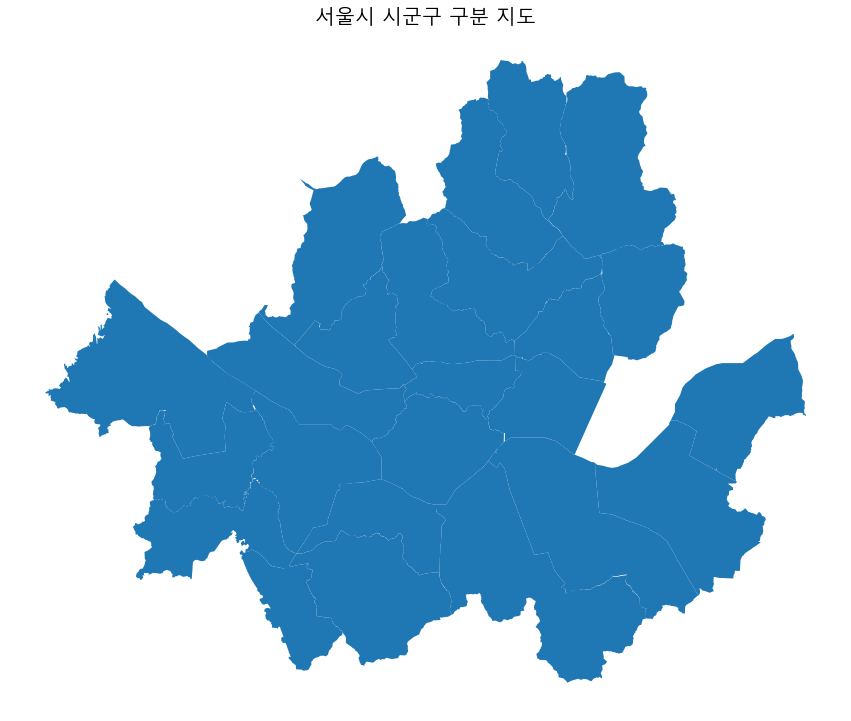

In [8]:
import matplotlib.pyplot as plt

ax = seoul.plot(figsize = (15,15))
ax.set_title('서울시 시군구 구분 지도', fontsize = 20)
ax.set_axis_off()                 #x,y축 제거

plt.show()

##### 구분에 사용될 데이터 로드

In [9]:
index_region = pd.read_excel('C:/Users/병현/index_region.xlsx')

In [10]:
index_region.head()

,sigungu,mean,std,latitude,longitude
0,all,94.425023,26.558946,0.000000,0.000000
1,강남구,94.075333,49.293050,37.495985,127.066409
2,강동구,100.576943,42.125590,37.549208,127.146482
3,강북구,92.885849,31.203461,37.646995,127.014716
4,강서구,92.603437,30.564484,37.565762,126.822656


##### merge를 위해 column명 같게 해줌

In [11]:
seoul.rename(columns={'A2' : 'sigungu'}, inplace = True)
seoul

C:\Anaconda3_19_1222\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,A0,A1,sigungu,A3,geometry
0,33,11140,중구,2020-06-03,"POLYGON ((199039.967 451760.211, 199060.329 45..."
1,33,11170,용산구,2020-06-03,"POLYGON ((195031.925 447949.046, 195033.882 44..."
2,49,11200,성동구,2020-06-03,"POLYGON ((202296.211 451417.806, 202270.965 45..."
3,49,11230,동대문구,2020-06-03,"POLYGON ((201974.268 452860.634, 201974.872 45..."
4,33,11260,중랑구,2020-06-03,"POLYGON ((207852.300 457470.180, 207854.560 45..."
5,337,11290,성북구,2020-06-03,"POLYGON ((200539.196 457971.047, 200577.303 45..."
6,49,11305,강북구,2020-06-03,"POLYGON ((200329.872 464741.822, 200417.947 46..."
7,33,11320,도봉구,2020-06-03,"POLYGON ((204440.010 462046.320, 204440.000 46..."
8,33,11350,노원구,2020-06-03,"POLYGON ((204002.999 459560.344, 204008.066 45..."
9,33,11380,은평구,2020-06-03,"POLYGON ((196541.414 459472.855, 196541.530 45..."


##### 위 shp의 데이터프레임에 merge(left join)

In [12]:
seoul = seoul.merge(index_region, on = 'sigungu', how = 'left')
seoul.head()

,A0,A1,sigungu,A3,geometry,mean,std,latitude,longitude
0,33,11140,중구,2020-06-03,"POLYGON ((199039.967 451760.211, 199060.329 45...",97.736684,110.992430,37.557945,126.994190
1,33,11170,용산구,2020-06-03,"POLYGON ((195031.925 447949.046, 195033.882 44...",96.287921,38.234269,37.531101,126.981074
2,49,11200,성동구,2020-06-03,"POLYGON ((202296.211 451417.806, 202270.965 45...",95.625866,29.223963,37.550675,127.040962
3,49,11230,동대문구,2020-06-03,"POLYGON ((201974.268 452860.634, 201974.872 45...",98.611367,34.090121,37.583801,127.050700
4,33,11260,중랑구,2020-06-03,"POLYGON ((207852.300 457470.180, 207854.560 45...",133.280136,218.254693,37.595379,127.093967


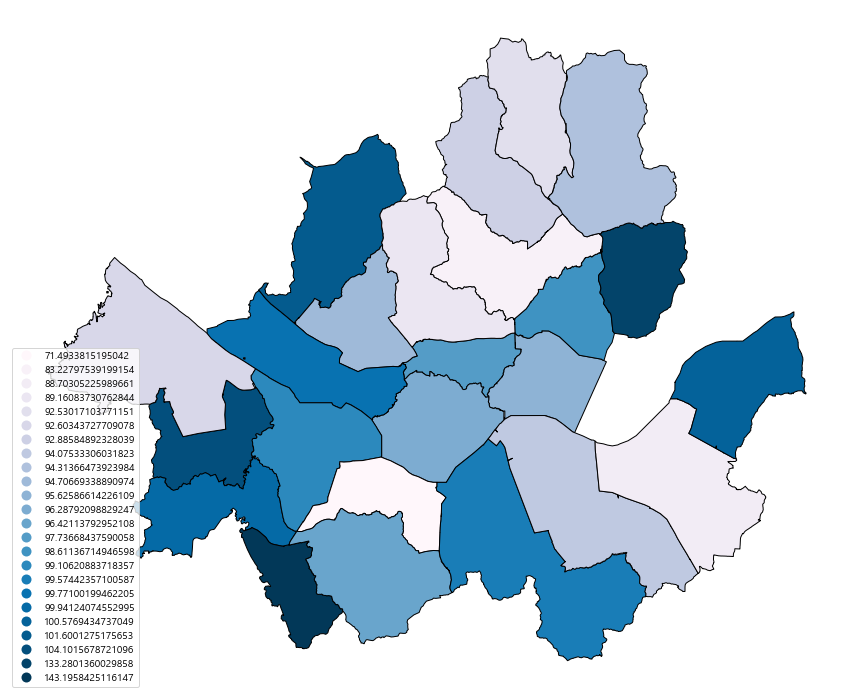

In [18]:
ax = seoul.plot(figsize = (15,15), column = 'mean', categorical=True,
                cmap="PuBu", edgecolor="k" , legend=True, legend_kwds={'loc': 3})
ax.set_axis_off()
plt.show()

##### 지도 위에 지역별 label 표시를 위해 구현했으나 , 잘 해결되지않음

In [19]:
seoul['coords'] = seoul['geometry'].apply(lambda x: x.representative_point().coords[:])
seoul['coords'] = [coords[0] for coords in seoul['coords']]

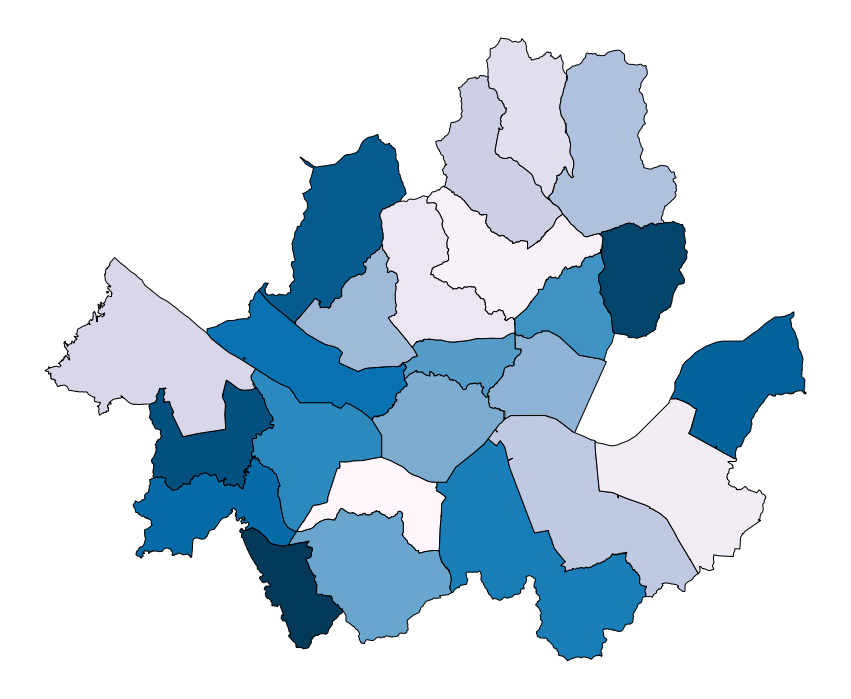

ValueError: Image size of 71293150x100591973 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [21]:
ax = seoul.plot(figsize = (15,15), column = 'mean', categorical=True,
                cmap="PuBu", edgecolor="k" )
ax.set_axis_off()
plt.show()

for idx, row in seoul.iterrows():
    plt.annotate(s=row['sigungu'], xy=row['coords'],
                 horizontalalignment='center')